## Problem statement

Lending Club is a platform that connects people seeking personal loans with investors willing to lend money. It primarily deals with urban customers and needs to decide whether to approve a loan application based on the applicant's profile.

Credit loss, or financial loss, primarily comes from lending to risky applicants, those who might not repay the loan. These defaulters, often labeled as 'charged-off,' cause the most significant loss to lenders.

The main goal is to reduce credit loss. There are two scenarios to consider:

Approving loans for applicants likely to repay them is profitable for the company due to interest earnings. Rejecting such applicants results in lost business opportunities.

On the other hand, approving loans for applicants unlikely to repay may lead to financial losses for the company when they default.

In essence, the company's challenge is to strike a balance between maximizing profitable loans and minimizing the risk of financial losses.


## Objective

The goal is to find risky loan applicants in order to reduce credit loss. This case study focuses on identifying such applicants using exploratory data analysis (EDA).

In simpler terms, the company aims to discover the key factors that lead to loan default, the strong indicators of default. This knowledge will help the company manage its portfolio and assess risk effectively.

### Intial setup of python Libraries for Data and Visualization

In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
# Fixing the warning by specifying dtype = object
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 120)

loan_data_df = pd.read_csv('loan.csv', dtype=object)
loan_detail_df = pd.read_excel('Data_Dictionary.xlsx')

#### Reading Loan DF and creating Metadata

In [327]:
print("Loan data shape:",loan_data_df.shape)
print("Loan data information")
print(loan_data_df.info())

Loan data shape: (39717, 111)
Loan data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
None


### Metadata 

In [328]:
#number of columns in Loan data
print("Number of Columns", loan_data_df.shape[1])
#number of rows in Loan data
print("Number of rows", loan_data_df.shape[0])
#number of duplicate values
print("Duplicate value in Loan data", loan_data_df.duplicated().sum())
#number of columns with only null value
print("Number of columns with null values",(loan_data_df.isnull().all(axis=0).sum()))
#numbers of rows with only null values
print("Number of rows with null values",(loan_data_df.isnull().all(axis=1).sum()))


Number of Columns 111
Number of rows 39717
Duplicate value in Loan data 0
Number of columns with null values 54
Number of rows with null values 0


# Data Cleaning

We will start the process of Data Cleaning here
*******************************************************************************************************************


###  Row Cleaning
        Delete summary row if any
        delete incorrect row
        delete empty row
        delete incorrect row
### Columns Cleaning
        Merge columns for creating unique identifiers if needed
        Split columns for more data: Split address to get State and City to analyse each separately
        Add column names: Add column names if missing
        Rename columns consistently: Abbreviations, encoded columns
        Delete columns: Delete unnecessary columns
        Align misaligned columns: Dataset may have shifted columns

In [323]:
#delete the Loan columns containing only null values
loan_data_df.dropna(axis=1,how='all',inplace=True)

In [324]:
#set to display maximum rows
pd.set_option('display.max_rows', None)
(loan_data_df.isna().sum()).sort_values()

id                          0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
total_acc                   0
out_prncp                   0
out_prncp_inv               0
total_pymnt                 0
total_pymnt_inv             0
total_rec_prncp             0
total_rec_int               0
total_rec_late_fee          0
recoveries                  0
collection_recovery_fee     0
last_pymnt_amnt             0
earliest_cr_line            0
dti                         0
delinq_2yrs                 0
sub_grade                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
addr_state                  0
pub_rec_bankruptcies        0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_statu

In [306]:
#dropping off columns with maximum values as null
columns_to_drop = ['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d']
loan_data_df.drop(columns_to_drop,axis=1,inplace=True)

## Check the dataframe with unique values

In [307]:
loan_data_df.apply(lambda x: x.nunique()).sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

### Based on the result of nunique method, below columns were identified with same values

1.tax_liens -->                     1<br/>
2.delinq_amnt      -->              1<br/>
3.chargeoff_within_12_mths -->      1<br/>
4.acc_now_delinq               -->  1<br/>
5.application_type    -->           1<br/>
6.policy_code    -->                1<br/>
7.collections_12_mths_ex_med  -->   1<br/>
8.initial_list_status   -->         1<br/>
9.pymnt_plan            -->         1<br/>

Reading from the loan data dictonary above columns might be important but not this data sets due to common values for all the records, hence deleting these columns

In [329]:
nunique_loan_columns = ['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code'
             ,'collections_12_mths_ex_med','initial_list_status','pymnt_plan']
loan_data_df.drop(columns=nunique_loan_columns,axis=1,inplace=True)

In [330]:
#on further analysis of columns, we can drop the 
# zip_code - Does not have the full zip-code and the xx - value code be either same or different
# url - Does not provide relevant information
# member_id - this dataframe contain unique values only, so we can drop it as well
# emp_title - the are text and does not contribute 

nonrelevant_loan_column_values = ['zip_code','url','member_id','emp_title']
loan_data_df.drop(columns=nonrelevant_loan_column_values,axis=1,inplace=True)

### Standardising Value
    Numerical values
    Standardise units
### Invalid values
    Encode unicode properly 
    Correct the incorrect data types to the correct data types for ease of analysis.
    

In [310]:
# updating the NAN value available in different columns to clean values
# pub_rec_bankruptcies - update the values with 'Not Available'
# emp_length - format the employee length correctly to Numerics values

loan_data_df.pub_rec_bankruptcies.fillna('Not Available',inplace=True)
loan_data_df.emp_length.fillna('0',inplace=True)
loan_data_df['emp_length'] = loan_data_df['emp_length'].apply(lambda x : x.replace('years','')
                                             .replace('+','')
                                             .replace('< 1','0.5')
                                             .replace('year',''))

### Remove extra characters like common prefix/suffix, leading/trailing/multiple spaces, etc.

In [311]:
# Now that we have filtered out -irrelevant columns, let check and clean the columns values
# int_rate - remove % symbol, check dtype if object convert it to float
# revol_util - remove % symbol, check dtype if object convert it to float
# term - remove months from the term value
# emp_length - formatting the columns valye

loan_data_df['int_rate'] = loan_data_df['int_rate'].str.rstrip('%')
loan_data_df['revol_util'] = loan_data_df['revol_util'].str.rstrip('%')
loan_data_df['term'] = loan_data_df['term'].str.rstrip('months')


## Update the amount columns to numeric values

In [312]:
# updating object type to numeric for amount columns
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc','revol_bal',
                   'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','int_rate']
loan_data_df[numeric_columns] = loan_data_df[numeric_columns].apply(pd.to_numeric)

In [246]:
loan_data_df.shape

(39717, 40)

## Create function doing common job such as plotting to reduce duplicate code

In [315]:
# common function to find the outliers
# Find the median,Q1,Q3 and IQR
# min Outliners = Q1 - 1.5IQR
# max Outliners = Q3 + 1.5IQR

def findOutliers(df, column ):
    quat1 = df[column].quantile(0.25)
    quat3 = df[column].quantile(0.75)
    iqr = quat3 - quat1
    min_outliner = loan_q1 - (1.5*loan_q1)
    max_outliner = loan_q3 + (1.5*loan_q3)
    return {'quat1': quat1, 'quat3': quat3, 'iqr': iqr, 'min_outliner': min_outliner, 'max_outliner': max_outliner}

def compareOutliers(df,column):
    
    # box plot before dropping outliers
    #fig, p = plot.subplots(1,2,figsize=(14, 3))
    splot1 = sns.boxplot(x = df[column])
    #splot1.set_title('Plot ['+ column + '] - Original')
    new_df = df[df[column] < findOutliers(df, column)['max_outliner']]
    # box plot after dropping outliers    
    splot2 = sns.boxplot(x = new_df[column])
    #splot2.set_title('Plot [' + column + '] - Post Outlier Treatment')
    #plot.tight_layout()
    plt.show()
    
# Function to reduce the max outliners
def deleteMaxOutliers(df,column):
    max_outliers = findOutliers(df, column)['max_outliner']
    new_df = df[df[column] < max_outliers]
    return new_df

# Function to reduce the min outliners
def deleteMinOutliers(df,column):
    
    new_df = df[df[column] > findOutliers(df, column)['min_outliner']]
    print(new_df.head())
    return new_df

# function to plot Univariate Analysis
def plot_univariate_analysis(df,column):
    fig, p = plt.subplots(1,2, figsize=(14, 5))
    sns.histplot(df.loc[df[column].notnull(), column], kde=True,ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column)
    p[1].set_xlabel(column)
    plt.tight_layout()
    plt.show()



### Remove Outliners
    Find the median,Q1,Q3 and IQR
    min Outliners = Q1 - 1.5*IQR
    max Outliners = Q3 + 1.5*IQR

In [ ]:

# columns subject to outliers are
# loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti
# removing outliers from above columns for better analysis

outliers_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti']
for column in outliers_columns:
    #compareOutliers(loan_data_df,column)
    loan_data_df = deleteMaxOutliers(loan_data_df , column)

In [259]:
xyz = loan_data_df[loan_data_df['loan_amnt'] < 7400.0]


## Univariate Analysis 
   1.Quantative variable analysis </br>
   2.Categorical Analysis </br>
     # 2.1 Ordered </br>
     # 2.2 Unordered</br>

### 1.Loan Amount - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

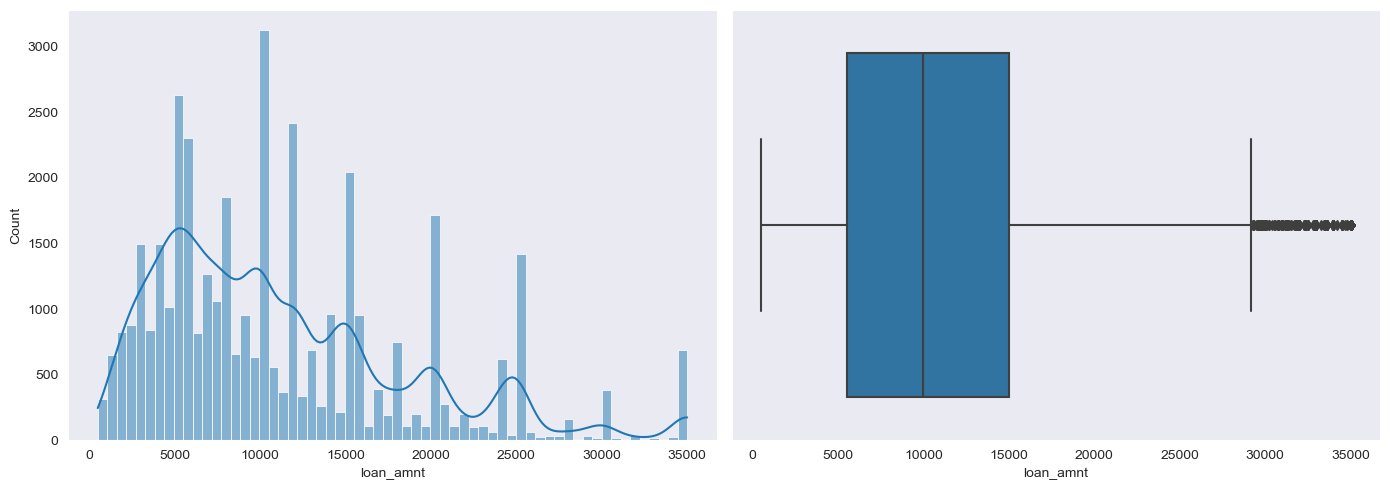

In [285]:
#univariate analysis of Loan amout sanctioned 
plot_univariate_analysis(loan_data_df,'loan_amnt')

#### looking at the boxplot generated we can confirm that the most common loan amout ranges between 5k~14K

### 2. Funded amount - The total amount committed to that loan at that point in time.

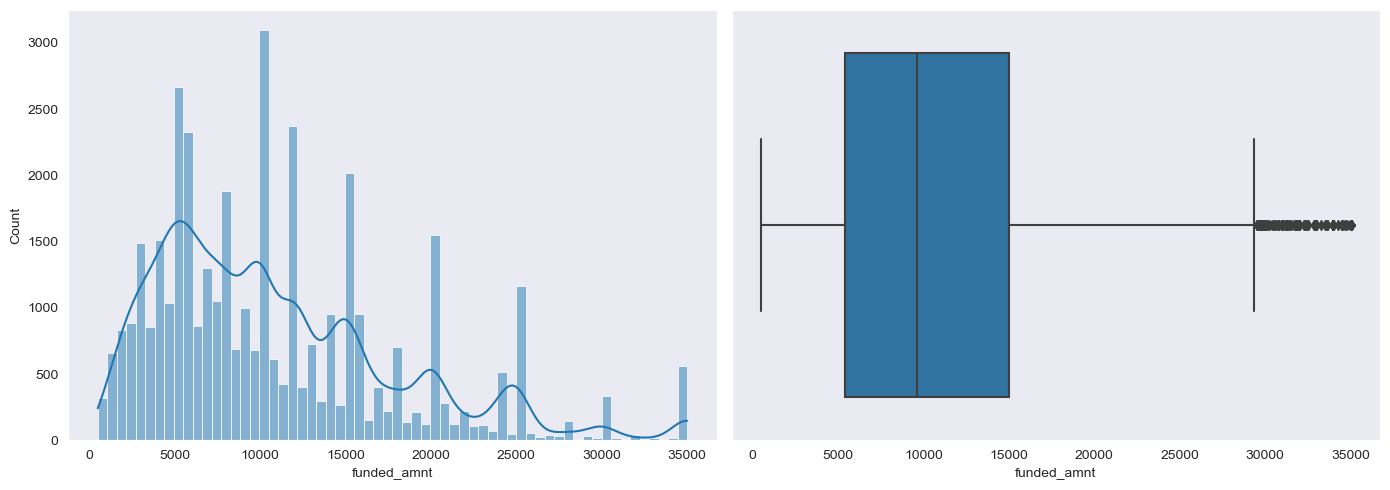

In [286]:
#univariate analysis of Loan amout sanctioned 
plot_univariate_analysis(loan_data_df,'funded_amnt')

#### looking at the boxplot generated we can confirm that the most common funded amout ranges between 5k~15K

### 3. funded_amnt_inv - The total amount committed by investors for that loan at that point in time.

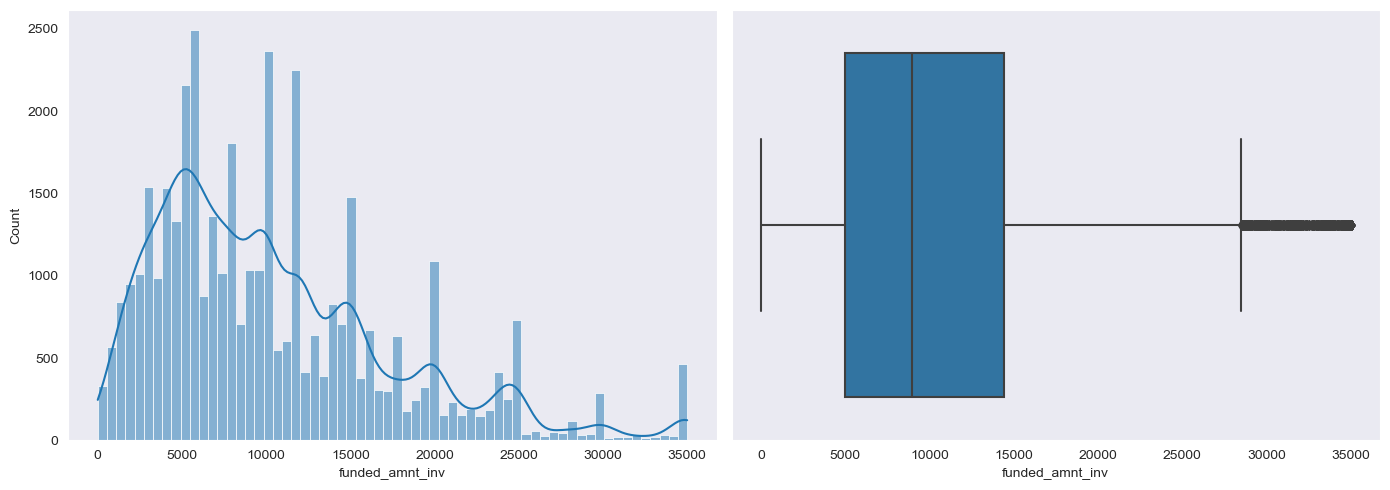

In [313]:
#univariate analysis of funded_amnt_inv sanctioned 
plot_univariate_analysis(loan_data_df,'funded_amnt_inv')

#### looking at the boxplot generated we can confirm that the most common funded_amnt_inv  ranges between 5k~15K

### 4.int_rate

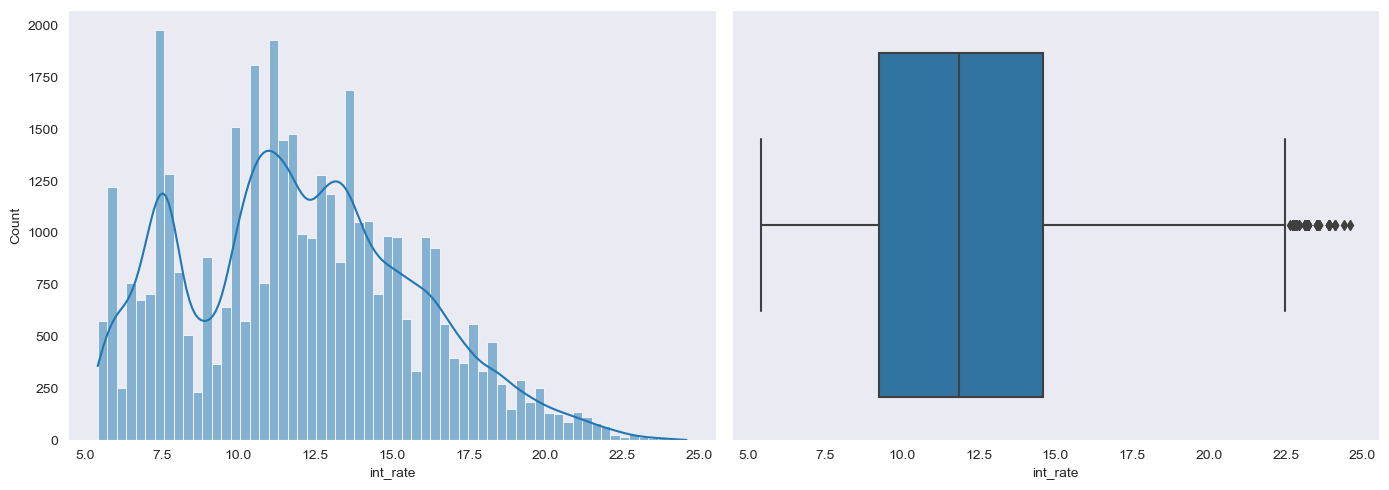

In [293]:
plot_univariate_analysis(loan_data_df,'int_rate')

#### int_rate range from 5% to 22.5 percent, majority of the inreset rate liers between 8%~15%

### 5.installment

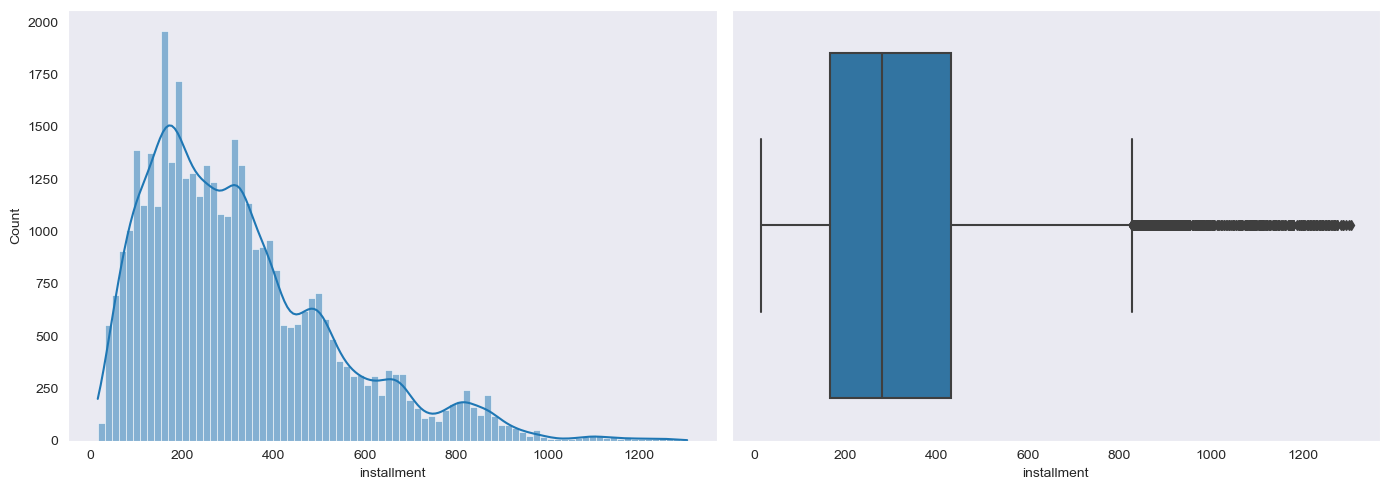

In [295]:
plot_univariate_analysis(loan_data_df,'installment')

### Majority of installment falls between 200 ~400 where max going till 800, we have few outliers too here

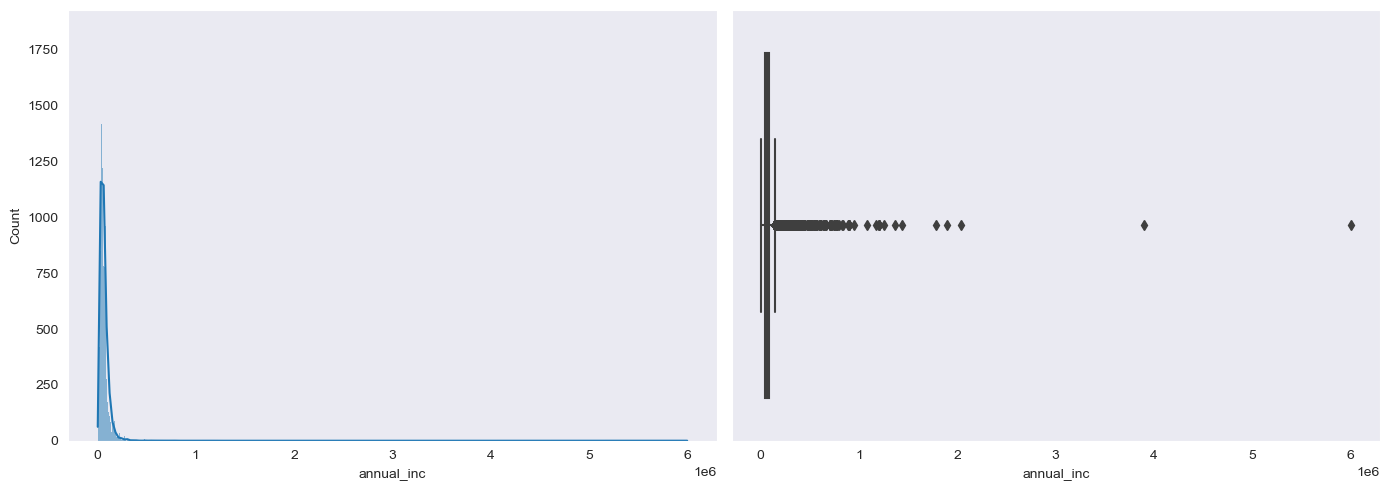

In [314]:
#univariate analysis of annual income  
plot_univariate_analysis(loan_data_df,'annual_inc')

#### as we can conclude from above plot that annual income have lots of outliers, let try to remove the outliers and </br>create the Plot again

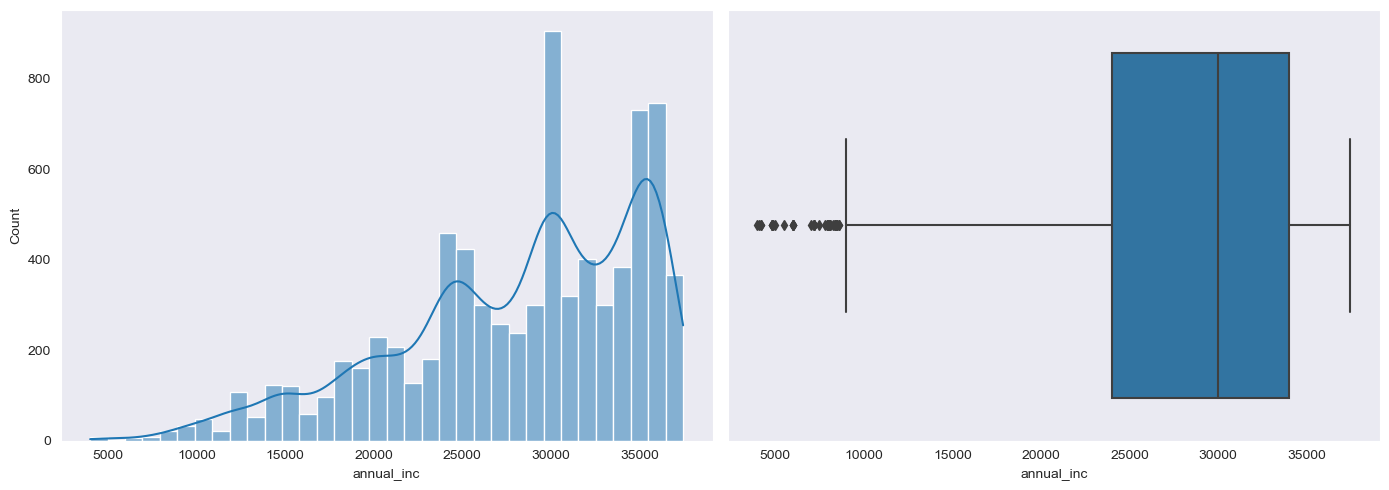

In [322]:
####univariate analysis of annual income after removing outliers from annual income
plot_univariate_analysis(deleteMaxOutliers(loan_data_df,'annual_inc'),'annual_inc')


### After cleaning the outliners we have now clear graph, income group majorliy lies between 7k ~25k

### ******************************************************************************************************************

### Categorical Variable analysis

In [294]:
loan_data_df['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

## Derived columns

In [22]:
# deriving year and month from loan issue dates so that, we can generate new dervied columns by binning the values

loan_data_df['issue_d'] = pd.to_datetime(loan_data_df.issue_d, format='%b-%y')
loan_data_df['issued_year'] = pd.DatetimeIndex(loan_data_df['issue_d']).year
loan_data_df['issued_month'] = pd.DatetimeIndex(loan_data_df['issue_d']).month

In [ ]:
# binning the month columns to create new derieved cloumns 'quarters'

loan_data_df[]
